<a href="https://colab.research.google.com/github/kellyslpang/unpackAIworkbooks/blob/main/Chest_Xray_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from IPython.display import Image, display
from fastbook import *
from fastai.vision.widgets import *


     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 2.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 186 kB 47.5 MB/s 
     |████████████████████████████████| 56 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 131 kB/s 
Mounted at /content/gdrive


In [ ]:
#tell colab to wrap text in cells

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


###Chest x-ray: Pneumonia predictor

Chest x-ray dataset from Kaggle:
https://www.kaggle.com/pcbreviglieri/pneumonia-xray-images

In [ ]:
path = Path('/content/gdrive/MyDrive/ai/ChestXray2')



In [ ]:
for f in path.ls():
  if f.is_dir(): print (f,":",len(f.ls()))

/content/gdrive/MyDrive/ai/ChestXray2/opacity : 3110
/content/gdrive/MyDrive/ai/ChestXray2/normal : 1082


In [ ]:
print((path/"normal").ls()[:5])

[Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0238-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0223-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0257-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0255-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0224-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0240-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0266-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0241-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0249-0001.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/normal/IM-0242-0001.jpeg')]


In [ ]:
print((path/"opacity").ls()[:5])

[Path('/content/gdrive/MyDrive/ai/ChestXray2/opacity/person551_virus_1091.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/opacity/person515_bacteria_2190.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/opacity/person542_virus_1072.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/opacity/person540_bacteria_2273.jpeg'), Path('/content/gdrive/MyDrive/ai/ChestXray2/opacity/person562_bacteria_2332.jpeg')]


In [ ]:
def get_y(file):
  fregex = RegexLabeller(r'.*(bacteria|virus).*', match=True)
  if parent_label(file) == "normal":
    return "normal"
  else:
    return fregex(file)

In [ ]:
for o in range(10):
  print(get_y((path/"normal").ls()[o]))

normal
normal
normal
normal
normal
normal
normal
normal
normal
normal


In [ ]:
xrayDB = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=get_y,
    item_tfms=Resize(512))

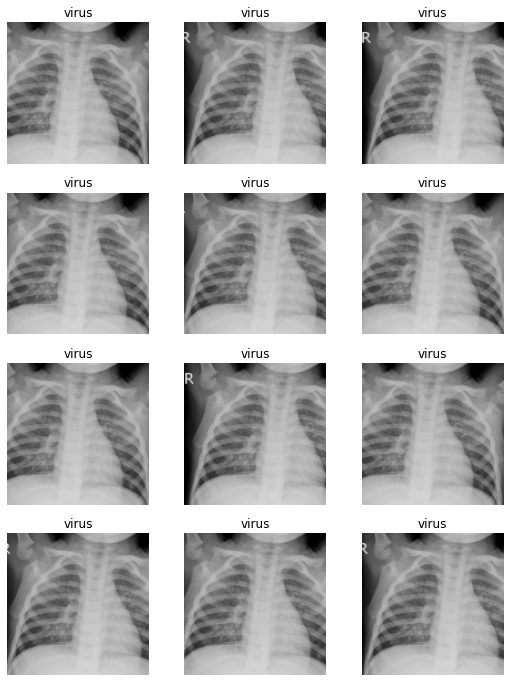

In [ ]:
dls = xrayDB.dataloaders(path, bs=32)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

In [ ]:
xrayDB = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(512))
dls = xrayDB.dataloaders(path, bs=32)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

#dls.valid.show_batch(max_n=4, nrows=1)
#    item_tfms=RandomResizedCrop(256, min_scale=0.3))

#    batch_tfms=aug_transforms())
#dls = xrayDB.dataloaders(path, bs=8)


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.115091,0.786908,0.274463,12:10


epoch,train_loss,valid_loss,error_rate,time
0,0.688564,0.441976,0.160700,06:56
1,0.546108,0.385216,0.151949,07:00


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.188960,0.396543,0.126492,02:36


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
  learn.save(path/f"20210822-run1") 

Path('/content/gdrive/MyDrive/ai/ChestXray2/20210822-run1.pth')

In [ ]:
dls.bs


32

In [ ]:
for i in range(10):
  learn.fine_tune(1)
  learn.save(path/f"20210817-{i}") 

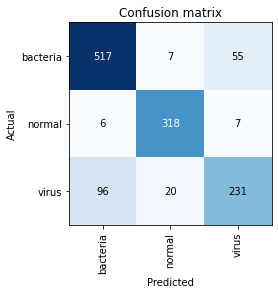

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

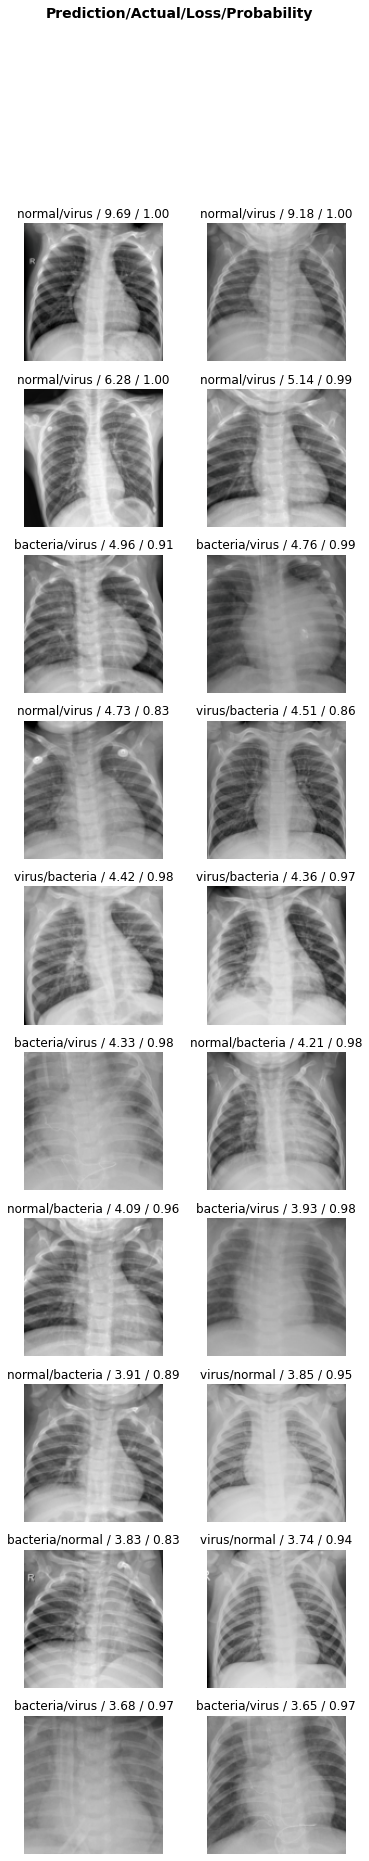

In [ ]:
interp.plot_top_losses(20, nrows=10)


In [ ]:
learn.export(path/'xray-Resize256.pkl')

In [ ]:
parapath = Path('gdrive/MyDrive/ai/')
parapath.ls(file_exts='.pkl')

In [ ]:
#learn_inf = load_learner(parapath/'RCrop512IMPvsBAR.pkl')
learn_inf = load_learner(parapath/'RanResizeCrop256.pkl')

In [ ]:
from IPython.display import Image, display

In [ ]:
directory = 'gdrive/MyDrive/ai/test'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(directory, filename))
        print (learn_inf.predict(os.path.join(directory, filename)))
        display(Image(os.path.join(directory, filename),width = 256))
        print ("\r\n")
    else:
        continue